## Bir sınıflandırma sinir ağının tipik mimarisi

Tipik kelimesi kasıtlıdır.

Çünkü bir sınıflandırma sinir ağının mimarisi, üzerinde çalıştığınız soruna bağlı olarak büyük ölçüde değişebilir.

Ancak, tüm derin sinir ağlarının içerdiği bazı temeller vardır:

- Bir giriş katmanı.
- Bazı gizli katmanlar.
- Bir çıktı katmanı.

Geri kalanın çoğu, modeli oluşturan veri analistine kalmış.

Aşağıdakiler, sınıflandırma sinir ağlarınızda sıklıkla kullanacağınız bazı standart değerlerdir.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Görüntülemek ve sığdırmak için veri oluşturma

Bir sınıflandırma veri setini içe aktararak başlayabiliriz, ancak hadi kendi sınıflandırma verilerimizden bazılarını oluşturmaya çalışalım.

> 🔑 Not: Asıl sorununuza geçmeden önce sizi ve modelinizi bir oyuncak (veya basit) veri kümesi üzerinde çalıştırmanız yaygın bir uygulamadır. Gerçek deney(ler)den önce bunu bir prova deneyi olarak ele alın.

Sınıflandırma, bir şeyin bir şey olup olmadığını tahmin ettiğinden, bunu yansıtmak için bazı veriler yapalım.

Bunu yapmak için Scikit-Learn'ün `make_circles()` işlevini kullanacağız.

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

Harika, şimdi biraz veri oluşturduk, özelliklere (X) ve etiketlere (y) bakalım.

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Tamam, bazı verilerimizi ve etiketlerimizi gördük, görselleştirmeye geçmeye ne dersiniz?

> 🔑 Not: Herhangi bir tür makine öğrenimi projesi başlatmanın önemli bir adımı, verilerle bir olmaktır. Bunu yapmanın en iyi yollarından biri, üzerinde çalıştığınız verileri mümkün olduğunca görselleştirmektir. Veri gezgininin sloganı "görselleştir, görselleştir, görselleştir".

Bir DataFrame ile başlayacağız.

In [5]:
# Make dataframe of features and labels
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Ne tür etiketlerle uğraşıyoruz?

In [6]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Pekala, bir ikili sınıflandırma problemiyle uğraşıyoruz gibi görünüyor. İkilidir çünkü yalnızca iki etiket vardır (0 veya 1).

Daha fazla etiket seçeneği olsaydı (ör. 0, 1, 2, 3 veya 4), çok sınıflı sınıflandırma olarak adlandırılırdı.

Görselleştirmemizi bir adım daha ileri götürelim ve verilerimizi çizelim.

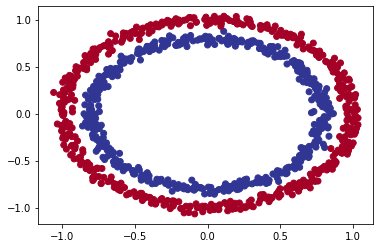

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Güzel! Arsadan, ne tür bir model inşa etmek isteyebileceğimizi tahmin edebilir misiniz?

Mavi veya kırmızı noktaları sınıflandırmak için bir tane oluşturmaya çalışsak nasıl olur? Maviyi kırmızı noktalardan ayırt edebilen bir model.

> 🛠 Alıştırma: İlerlemeden önce, [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) ile 10 dakika oyun oynamak isteyebilirsiniz. Gördüğünüz farklı hiperparametreleri ayarlamayı deneyin ve bir sinir ağı trenini görmek için oynat'ı tıklayın. Sanırım az önce oluşturduğumuza çok benzer verileri bulacaksınız.

## Giriş ve çıkış şekilleri
Sinir ağları oluştururken karşılaşacağınız en yaygın sorunlardan biri şekil uyumsuzluklarıdır.

Daha spesifik olarak, girdi verilerinin şekli ve çıktı verilerinin şekli.

Bizim durumumuzda, X'i girmek ve modelimizin y'yi tahmin etmesini sağlamak istiyoruz.

Şimdi X ve y'nin şekillerini kontrol edelim.

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Hmm, bu rakamlar nereden geliyor?

In [9]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

Yani y değeri kadar X değerimiz var, bu mantıklı.

Her birinin bir örneğini inceleyelim.

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Pekala, bir y değerine yol açan iki X özelliğimiz var.

Bu, sinir ağımızın girdi şeklinin en az bir boyutu iki olan bir tensörü kabul etmesi ve en az bir değere sahip bir tensör çıkışı vermesi gerektiği anlamına gelir.

> 🤔 Not: (1000,) şeklinde bir y olması kafa karıştırıcı görünebilir. Ancak bunun nedeni, tüm y değerlerinin aslında skaler (tek değerler) olması ve bu nedenle bir boyutu olmamasıdır. Şimdilik, çıktı şeklinizin en azından bir y örneğiyle aynı değerde olduğunu düşünün (bizim durumumuzda, sinir ağımızın çıktısı en az bir değer olmalıdır).

## Modellemedeki adımlar
Artık elimizde hangi verilere ve girdi ve çıktı şekillerine sahip olduğumuzu biliyoruz, onu modellemek için nasıl bir sinir ağı kuracağımıza bakalım.

TensorFlow'da bir model oluşturmak ve eğitmek için tipik olarak 3 temel adım vardır.

- **Bir model oluşturma**<br> - bir sinir ağının katmanlarını kendiniz bir araya getirin (işlevsel veya sıralı API'yi kullanarak) veya önceden oluşturulmuş bir modeli içe aktarın (aktarım öğrenimi olarak bilinir).
- **Bir model derleme**<br> - bir modelin performansının nasıl ölçüleceğini (kayıp/metrikler) tanımlamanın yanı sıra nasıl iyileştirileceğini (optimizer) tanımlama.
- **Model uydurma**<br> - modelin verilerdeki kalıpları bulmaya çalışmasına izin vermek (X, y'ye nasıl ulaşır).
Regresyon verilerimiz için bir model oluşturmak üzere 

Sıralı API'yi kullanarak bunları çalışırken görelim. Ve sonra her birinin üzerinden geçeceğiz.

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


Doğruluk metriğine bakıldığında, modelimiz zayıf bir performans sergiliyor (ikili sınıflandırma probleminde %50 doğruluk, tahmin etmeye eşdeğerdir), ama ya onu daha uzun süre eğitirsek?

In [12]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Verilerin 200 geçişinden sonra bile, hala tahmin ediyormuş gibi performans gösteriyor.

Fazladan bir katman ekleyip biraz daha uzun süre eğitsek ne olur?

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [14]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

tahmin etmek kadar iyi olmayana kadar (~%50 doğruluk)... hmm...?

Modellerimizi geliştirmek için kullanabileceğimiz birkaç yolu daha hatırlatalım.



## Bir modeli geliştirmek

Modelimizi geliştirmek için daha önce geçtiğimiz 3 adımın neredeyse her bölümünü değiştirebiliriz.

- **Bir model oluşturma** <br>- burada daha fazla katman eklemek, her katmandaki gizli birimlerin (nöronlar olarak da adlandırılır) sayısını artırmak, her katmanın etkinleştirme işlevlerini değiştirmek isteyebilirsiniz.
- **Bir model derleme** <br>- farklı bir optimizasyon işlevi (genellikle birçok sorun için oldukça iyi olan Adam optimize edici gibi) seçmek veya belki de optimizasyon işlevinin öğrenme oranını değiştirmek isteyebilirsiniz.
- **Bir modeli takmak** <br>- belki de bir modeli daha fazla çağa sığdırabilirsiniz (onu daha uzun süre eğitmeye bırakın).

Daha fazla nöron, fazladan bir katman ve arkadaşımız Adam optimize edici eklemeye ne dersiniz?

Elbette bunu yapmak tahmin etmekten daha iyidir...

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [16]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

Hala!

Birkaç numara çıkardık ama modelimiz tahmin etmekten bile daha iyi değil.

Neler olduğunu görmek için bazı görselleştirmeler yapalım.

> 🔑 Not: Modeliniz garip bir şekilde performans gösterdiğinde veya verilerinizle ilgili tam olarak emin olmadığınız bir şeyler olduğunda, şu üç kelimeyi hatırlayın: görselleştir, görselleştir, görselleştir. Verilerinizi inceleyin, modelinizi inceleyin, modelinizin tahminlerini inceleyin.

Modelimizin tahminlerini görselleştirmek için bir `plot_decision_boundary()` fonksiyonu oluşturacağız ve bu fonksiyon:

Eğitilmiş bir modeli, özellikleri (X) ve etiketleri (y) alır.
- Farklı X değerlerinden oluşan bir ağ ızgarası oluşturur.
- [Meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) üzerinden tahminler yapar.
- Tahminleri ve farklı bölgeler (her benzersiz sınıfın düştüğü yer) arasında bir çizgi çizer.
- Bu kafa karıştırıcı geliyorsa, kodda görelim ve çıktıyı görelim.

> 🔑 Not: Bir işlevin ne yaptığından emin değilseniz, ne yaptığını görmek için onu çözmeyi ve satır satır yazmayı deneyin. Küçük parçalara ayırın ve her bir parçanın çıktısını görün.

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


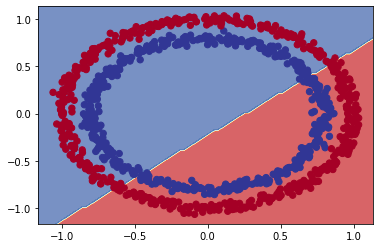

In [18]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)

Görünüşe göre modelimiz veriler arasında düz bir çizgi çizmeye çalışıyor.

Bunu yapmanın nesi yanlış?

Ana sorun, verilerimizin düz bir çizgiyle ayrılamamasıdır.

Bir regresyon probleminde modelimiz işe yarayabilir. Aslında, deneyelim.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh bekle... modelimizi bir ikili sınıflandırma problemi için derledik.

Sorun değil, bir regresyon sorunu için yeniden oluşturabiliriz.

In [20]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

Tamam, modelimiz bir şeyler öğreniyor gibi görünüyor (mae değeri her çağda aşağı doğru eğilim gösteriyor), hadi tahminlerini çizelim.

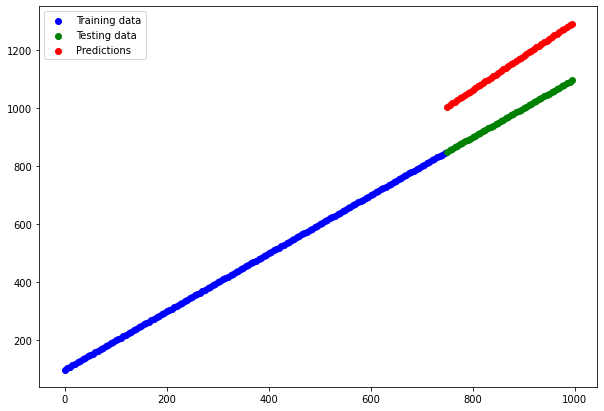

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Tamam, tahminler mükemmel değil (tahminler mükemmel olsaydı, kırmızı yeşille aynı hizaya gelirdi), ancak tam tahminden daha iyi görünüyorlar.

Yani bu, modelimizin bir şeyler öğreniyor olması gerektiği anlamına geliyor...

Sınıflandırma problemimiz için gözden kaçırdığımız bir şey olmalı.

## Eksik parça: Doğrusal olmama

Tamam, sinir ağımızın düz çizgileri modelleyebildiğini gördük (tahmin etmekten biraz daha iyi bir yetenekle).

Düz olmayan (doğrusal olmayan) çizgiler ne olacak?

Sınıflandırma verilerimizi (kırmızı ve ipucu daireleri) modelleyeceksek, bazı doğrusal olmayan çizgilere ihtiyacımız olacak.

> 🔨 Alıştırma: Sonraki adımlara geçmeden önce, TensorFlow Playground ile 10 dakika oynamanızı tavsiye ederim (verilerin kendi sınıflandırma verilerimizle ortak noktalarına bakın). Özellikle "aktivasyon" yazan sekme. İşiniz bittiğinde geri dönün.

Aktivasyon seçeneklerini denediniz mi? Eğer öyleyse, ne buldunuz?

Eğer yapmadıysanız, endişelenmeyin, kodda görelim.

Bu bağlantıda görebileceğiniz sinir ağını çoğaltacağız: TensorFlow Playground.

In [22]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" is short for "learning rate"
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7653 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6467 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4973 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3844 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2352 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9892 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6029 - accuracy: 0.5000
Epoch 11/

Tamam, modelimiz tahmin etmekten biraz daha kötü performans gösteriyor.

Verilerimizin neye benzediğini kendimize hatırlatalım.

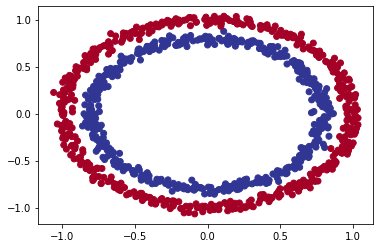

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Bakalım modelimiz bu konuda nasıl tahminlerde bulunuyor.

doing binary classifcation...


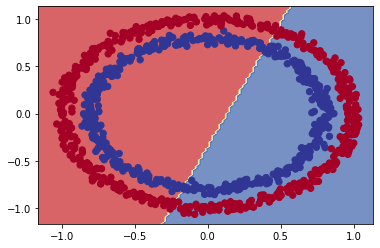

In [24]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Görünüşe göre yine düz (doğrusal) bir çizgi tahmini alıyoruz.

Ama verilerimiz doğrusal değil (düz bir doğru değil)...

Yapmamız gereken, modelimize biraz doğrusal olmayanlık eklemek.

Bunu yapmak için, katmanlarımızın üzerinde aktivasyon parametresini kullanacağız.

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0406 - accuracy: 0.4550
Epoch 11/

Hmm... hala öğrenemiyorum...

Nöronların ve katmanların sayısını artırırsak ne olur?

Diyelim ki, ReLU ile 2 gizli katman, "rel-u" olarak telaffuz edildi, (düzeltilmiş doğrusal birimin kısaltması), ilkinde aktivasyon ve her biri 4 nöron?

Bu ağı çalışırken görmek için TensorFlow Playground demosuna bakın.

<img src="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-two-layer-net-relu-activation.png" />

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Hala %50 doğruluğa ulaşıyoruz, modelimiz hala pratikte tahmin etmek kadar iyi.

Tahminler nasıl görünüyor?

doing binary classifcation...


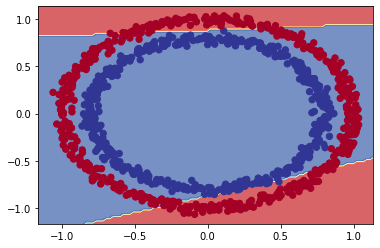

In [28]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

Ne oluyor?

Görünüşe göre modelimiz TensorFlow Playground'dakiyle aynı ama model hala düz çizgiler çiziyor...

İdeal olarak, sarı çizgiler kırmızı dairenin ve mavi dairenin iç kısmına gider.

Tamam, tamam, hadi bu daireyi bir kereliğine modelleyelim.

Bir model daha (söz veriyorum... aslında, bu sözü bozmak zorunda kalacağım... daha birçok model üreteceğiz).

Bu sefer çıktı katmanımızdaki aktivasyon fonksiyonunu da değiştireceğiz. Bir sınıflandırma modelinin mimarisini hatırlıyor musunuz? İkili sınıflandırma için, çıktı katmanı aktivasyonu genellikle Sigmoid aktivasyon fonksiyonudur.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [30]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

Vay! Modelimiz bazı inanılmaz sonuçlar alıyor gibi görünüyor, hadi bunları kontrol edelim.

doing binary classifcation...


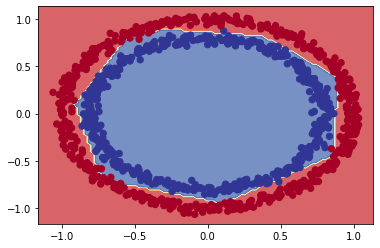

In [31]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

Güzel! Görünüşe göre modelimiz iki daireyi birbirinden ayıran (birkaç örnek dışında) neredeyse mükemmel.

> 🤔 Soru: Yaptığımız tahminlerde yanlış olan ne? Burada modelimizi gerçekten doğru değerlendiriyor muyuz? İpucu: Model hangi verileri öğrendi ve biz neyi tahmin ettik?

Buna cevap vermeden önce, az önce ele aldığımız şeyin farkına varmak önemlidir.

> 🔑 Not: Doğrusal (düz çizgiler) ve doğrusal olmayan (düz olmayan çizgiler) işlevlerin birleşimi, sinir ağlarının temel temellerinden biridir.

Bunu şöyle düşünün:

Size sınırsız sayıda düz çizgi ve düz olmayan çizgi vermiş olsaydım, ne tür desenler çizebilirdiniz?

Esasen sinir ağlarının verilerdeki kalıpları bulmak için yaptığı şey budur.

Şimdi "ama daha önce lineer bir fonksiyon veya lineer olmayan bir fonksiyon görmedim..." diye düşünebilirsiniz.

Ama var.

Bütün zaman boyunca onları kullandık.

Yeni oluşturduğumuz modellerdeki katmanlara güç veren onlar.

Az önce kullandığımız aktivasyon fonksiyonları hakkında biraz fikir edinmek için, onları oluşturalım ve sonra bazı oyuncak verileri üzerinde deneyelim.

In [32]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

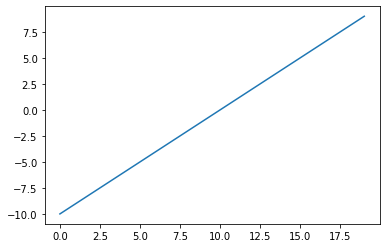

In [33]:
# Visualize our toy tensor
plt.plot(A);

Düz (doğrusal) bir çizgi!

Güzel, şimdi sigmoid fonksiyonunu yeniden oluşturalım ve verilerimize ne yaptığını görelim. Ayrıca tf.keras.activations.sigmoid adresinde önceden oluşturulmuş bir sigmoid işlevi de bulabilirsiniz.

In [34]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

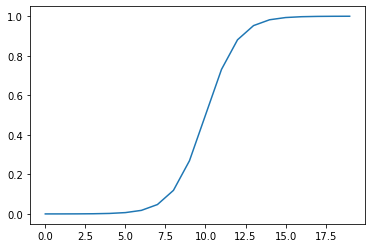

In [35]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

Düz olmayan (doğrusal olmayan) bir çizgi!

Tamam, ReLU işlevine ne dersiniz (ReLU tüm negatifleri 0'a çevirir ve pozitif sayılar aynı kalır)?

In [36]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

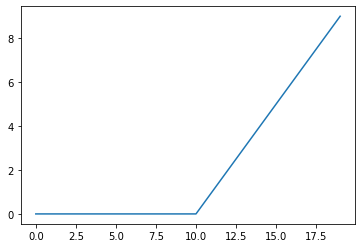

In [37]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

Düz olmayan bir çizgi daha!

Peki, TensorFlow'un lineer aktivasyon fonksiyonuna ne dersiniz?

In [38]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Hmm, girdilerimiz değiştirilmemiş gibi görünüyor...

In [39]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Tamam, bu nedenle, modelin yalnızca doğrusal etkinleştirme işlevlerini kullanırken gerçekten hiçbir şey öğrenmemesi mantıklıdır, çünkü doğrusal etkinleştirme işlevi, giriş verilerimizi hiçbir şekilde değiştirmez.

Doğrusal olmayan fonksiyonlarımızla verilerimiz manipüle edilir. Bir sinir ağı, girdileri ve çıktıları arasındaki desenleri çizmek için bu tür dönüşümleri büyük ölçekte kullanır.

Şimdi, sinir ağlarının cesaretine dalmak yerine, öğrendiklerimizi farklı problemlere uygulayarak kodlamaya devam edeceğiz, ancak sahne arkasında neler olup bittiğine daha derinlemesine bakmak istiyorsanız, Ekstra Müfredata göz atın. aşağıdaki bölüm.

> 📖 Kaynak: Aktivasyon işlevleri hakkında daha fazla bilgi için, bunlarla ilgili [makine öğrenimi sayfasına ](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#)bakın.

## Sınıflandırma modelimizin değerlendirilmesi ve iyileştirilmesi

Yukarıdaki soruya cevap verdiyseniz, yanlış yaptığımızı anlamış olabilirsiniz.

Modelimizi, eğitim aldığı aynı veriler üzerinde değerlendiriyorduk.

Verilerimizi eğitim, doğrulama (isteğe bağlı) ve test kümelerine bölmek daha iyi bir yaklaşım olacaktır.

Bunu yaptıktan sonra, modelimizi eğitim setinde eğiteceğiz (verilerdeki desenleri bulmasına izin verin) ve ardından test setindeki değerleri tahmin etmek için kullanarak modelleri ne kadar iyi öğrendiğini göreceğiz.

Hadi yapalım.

In [40]:
# How many examples are in the whole dataset?
len(X)

1000

In [41]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

Harika, şimdi eğitim ve test setlerimiz var, hadi eğitim verilerini modelleyelim ve modelimizin test setinde öğrendiklerini değerlendirelim.

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [43]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set: 0.12468848377466202
Model accuracy on the test set: 100.00%


%100 doğruluk? Güzel!

Şimdi model_8'i oluşturmaya başladığımızda model_7 ile aynı olacağını söylemiştik ama bunu biraz yalan bulmuş olabilirsiniz.

Çünkü birkaç şeyi değiştirdik:

- **Aktivasyon parametresi**<br> - TensorFlow'da kitaplık yolları (tf.keras.activations.relu) yerine dizeler ("relu" & "sigmoid") kullandık, ikisi de aynı işlevselliği sunar.
- **Learning_rate (ayrıca lr) parametresi**<br> - Adam optimizer'deki öğrenme oranı parametresini 0,001 yerine 0,01'e yükselttik (10x artış).
  - Öğrenme oranını, bir modelin ne kadar hızlı öğrendiği olarak düşünebilirsiniz. Öğrenme oranı ne kadar yüksek olursa, modelin öğrenme kapasitesi o kadar hızlı olur, ancak, bir modelin çok hızlı öğrenmeye çalıştığı ve hiçbir şey öğrenmediği, çok yüksek bir öğrenme oranı gibi bir şey vardır. Yakında ideal öğrenme oranını bulmak için bir hile göreceğiz.
- **Epoch sayısı**<br>- Dönem sayısını (epochs parametresini kullanarak) 100'den 25'e düşürdük, ancak modelimiz hem eğitim hem de test setlerinde hala inanılmaz bir sonuç aldı.
  - Modelimizin eskisinden bile daha az çağda iyi performans göstermesinin nedenlerinden biri (tek bir çağda, modelin verideki kalıpları bir kez bakarak öğrenmeye çalışması olduğunu unutmayın, bu nedenle 25 çağ, modelin 25 şansı olduğu anlamına gelir) öncekinden daha fazla öğrenme oranı.

Modelimizin değerlendirme ölçütlerine göre iyi performans gösterdiğini biliyoruz ancak görsel olarak nasıl performans gösterdiğini görelim.

doing binary classifcation...
doing binary classifcation...


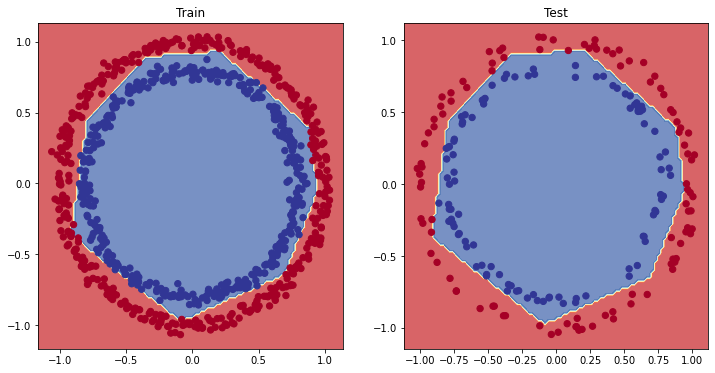

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Kontrol et! Ne kadar havalı. Birkaç ince ayar ile modelimiz artık mavi ve kırmızı daireleri neredeyse mükemmel bir şekilde tahmin ediyor.

## Kayıp eğrilerini çizin
Yukarıdaki grafiklere baktığımızda modelimizin çıktılarının çok iyi olduğunu görebiliriz.

Ama modelimiz öğrenirken nasıl gitti?

Olduğu gibi, modelin verilere bakma şansı olduğu her seferinde (her çağda bir kez) performans nasıl değişti?

Bunu anlamak için kayıp eğrilerini (öğrenme eğrileri olarak da adlandırılır) kontrol edebiliriz.

Bir modelde fit() işlevini çağırırken değişken geçmişini kullandığımızı görmüş olabilirsiniz (fit() bir Geçmiş nesnesi döndürür).

Modelimizin öğrenirken nasıl performans gösterdiğine dair bilgileri buradan alacağız.

Bakalım nasıl kullanacağız.

In [45]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Çıktıları inceleyerek kayıp değerlerinin düştüğünü ve doğruluğun arttığını görebiliriz.

Nasıl görünüyor (görselleştirin, görselleştirin, görselleştirin)?

Text(0.5, 1.0, 'Model_8 training curves')

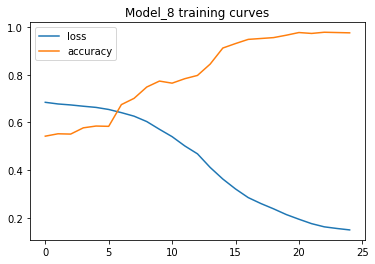

In [46]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Güzel. Bu, bir sınıflandırma problemiyle uğraşırken aradığımız ideal arsadır, kayıp azalır, doğruluk artar.

> 🔑 Not: Birçok problem için, kayıp fonksiyonunun düşmesi, modelin iyileştiği anlamına gelir (yaptığı tahminler temel doğruluk etiketlerine yaklaşmaktadır).

## En iyi öğrenme oranını bulma
Mimarinin (katmanlar, nöronların sayısı, aktivasyonlar vb.) yanı sıra, sinir ağı modelleriniz için ayarlayabileceğiniz en önemli hiperparametre öğrenme oranıdır.

model_8'de Adam optimizer'ın öğrenme oranını varsayılan 0,001'den (varsayılan) 0,01'e indirdiğimizi gördünüz.

Ve bunu neden yaptığımızı merak ediyor olabilirsiniz.

Bu şekilde koy, şanslı bir tahmindi.

Daha düşük bir öğrenme oranı denemeye ve modelin nasıl gittiğini görmeye karar verdim.

Şimdi "Cidden mi? Bunu yapabilir misin?" diye düşünüyor olabilirsiniz.

Ve cevap evet. Sinir ağlarınızın hiperparametrelerinden herhangi birini değiştirebilirsiniz.

Pratik yaparak, ne tür hiperparametrelerin işe yarayıp nelerin yaramadığını görmeye başlayacaksınız.

Bu, genel olarak makine öğrenimi ve derin öğrenme hakkında anlaşılması gereken önemli bir şeydir. Çok deneysel. Bir model kuruyorsunuz ve onu değerlendiriyorsunuz, bir model kuruyorsunuz ve onu değerlendiriyorsunuz.

Bununla birlikte, ileriye dönük modelleriniz için en uygun öğrenme oranını (en azından eğitime başlamak için) bulmanıza yardımcı olacak bir numara tanıtmak istiyorum.

Bunu yapmak için aşağıdakileri kullanacağız:

- Bir [learning rate callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
  - Geri aramayı, eğitim sırasında modelinize ekleyebileceğiniz ekstra bir işlevsellik parçası olarak düşünebilirsiniz.
- Başka bir model (yukarıdakilerin aynısını kullanabiliriz, burada model oluşturma alıştırması yapıyoruz).
- Değiştirilmiş bir kayıp eğrileri grafiği.

Her birinin üzerinden kodlarla geçeceğiz, sonra neler olduğunu açıklayacağız.

> 🔑 Not: TensorFlow'daki birçok sinir ağı yapı taşının varsayılan hiperparametreleri, genellikle kutudan çıkar çıkmaz çalışacak şekilde kurulur (örneğin, Adam optimizer'ın varsayılan ayarları genellikle birçok veri kümesinde iyi sonuçlar alabilir). Bu nedenle, önce varsayılanları denemek ve ardından gerektiği gibi ayarlamak iyi bir fikirdir.

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

Şimdi modelimizin eğitimi bitti, şimdi eğitim tarihine bir göz atalım.

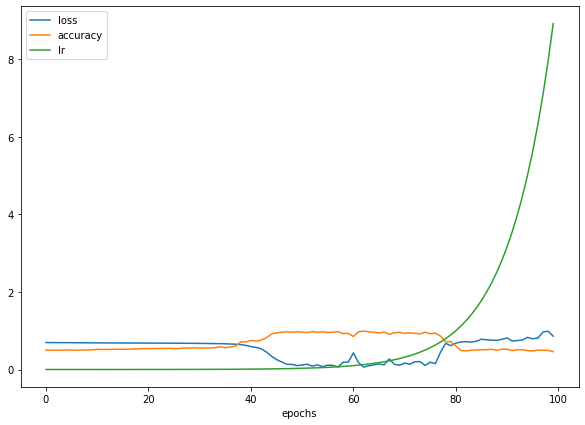

In [48]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Gördüğünüz gibi epoch sayısı arttıkça öğrenme oranı katlanarak artıyor.

Ve öğrenme oranı yavaşça arttığında belirli bir noktada modelin doğruluğunun arttığını (ve kaybın azaldığını) görebilirsiniz.

Bu çarpma noktasının nerede olduğunu bulmak için, günlük ölçekli öğrenme oranına karşı kaybı çizebiliriz.

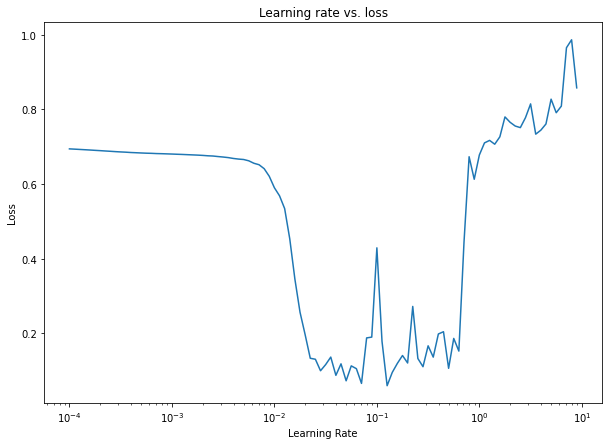

In [49]:
# Kayba karşı öğrenme oranını çizin
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Öğrenme hızının ideal değerini bulmak için (en azından modelimizi eğitmeye başlamak için ideal değer), temel kural, kaybın hala azalmakta olduğu ancak tam olarak düzleşmediği (genellikle yaklaşık 10 kat daha küçük) öğrenme hızı değerini almaktır. eğrinin altından daha).

Bu durumda ideal öğrenme oranımız 0,01 ( 10−2 ) ile 0,02 arasında olur.

<img src="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png" />

In [50]:
# Diğer tipik öğrenme oranı değerlerine örnek
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Şimdi modelimiz için ideal öğrenme oranını (0,02 kullanacağız) tahmin ettik, hadi yeniden yerleştirelim.

In [51]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

Güzel! Biraz daha yüksek öğrenme oranıyla (0,01 yerine 0,02), daha az çağda (25 yerine 20) model_8'den daha yüksek bir doğruluğa ulaşırız.

> 🛠 Alıştırma: Artık öğrenme oranını değiştirdiğinizde neler olabileceğine dair bir örnek gördünüz, TensorFlow Playground'da öğrenme hızı değerini değiştirmeyi deneyin ve ne olduğunu görün. Arttırırsan ne olur? azaltırsanız ne olur?

In [52]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

Bakalım tahminler nasıl olacak.

doing binary classifcation...
doing binary classifcation...


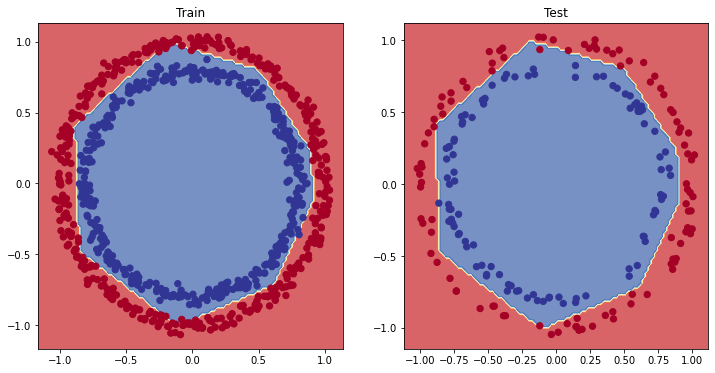

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

Ve gördüğümüz gibi, yine neredeyse mükemmel.

Bunlar, kendi modellerinizi oluştururken sıklıkla gerçekleştireceğiniz deneylerdir.

Varsayılan ayarlarla başlayın ve bunların verilerinizde nasıl performans gösterdiğini görün.

Ve istediğiniz kadar iyi performans göstermiyorlarsa, geliştirin.

Sınıflandırma modellerimizi değerlendirmenin birkaç yoluna daha bakalım.


## Daha fazla sınıflandırma değerlendirme yöntemi

Yaptığımız görselleştirmelerin yanı sıra, sınıflandırma modellerimizi değerlendirmek için kullanabileceğimiz bir dizi farklı değerlendirme ölçütü var.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |


> 🔑 Not: Her sınıflandırma problemi, farklı türde değerlendirme yöntemleri gerektirecektir. Ama en azından yukarıdakilere aşina olmalısınız.

Doğrulukla başlayalım.

Modelimizi derlerken metrics parametresine `["accuracy"]` ilettiğimiz için, üzerinde `evaluate()` öğesinin çağrılması, doğruluğun yanı sıra kaybı da döndürecektir.

In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.057401832193136215
Model accuracy on test set: 99.00%


Bir karışıklık matrisine ne dersiniz?

<img src="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png" />

Scikit-Learn'ün configuration_matrix yöntemini kullanarak bir karışıklık matrisi yapabiliriz.

In [55]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

Ahh, görünüşe göre tahminlerimiz olması gereken formatta değil.

Onları kontrol edelim.

In [56]:
# View the first 10 predictions
y_preds[:10]

array([[9.8526543e-01],
       [9.9923790e-01],
       [9.9032354e-01],
       [9.9706942e-01],
       [3.9623031e-01],
       [1.8126901e-02],
       [9.6829069e-01],
       [1.9746734e-02],
       [9.9967170e-01],
       [5.6459213e-04]], dtype=float32)

Test etiketlerimiz ne olacak?

In [57]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

Tahminlerimizi ikili formata (0 veya 1) almamız gerekiyor gibi görünüyor.

Ama merak ediyor olabilirsiniz, şu anda hangi formattalar?

Mevcut formatlarında (9.8526537e-01), tahmin olasılıkları adı verilen bir formdalar.

Bunu sinir ağlarının çıktılarında sıklıkla göreceksiniz. Genellikle kesin değerler olmayacaklar, ancak daha çok, şu veya bu değer olma olasılıklarının bir olasılığı olacaktır.

Bu nedenle, bir sinir ağı ile tahminler yaptıktan sonra sıklıkla göreceğiniz adımlardan biri, tahmin olasılıklarını etiketlere dönüştürmektir.

Bizim durumumuzda, temel doğruluk etiketlerimiz (y_test) ikili (0 veya 1) olduğundan, tf.round() kullanarak tahmin olasılıklarını ikili biçimlerine dönüştürebiliriz.

In [58]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Olağanüstü! Şimdi karışıklık_matrix işlevini kullanabiliriz.

In [59]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Pekala, en yüksek sayıların köşegende olduğunu görebiliyoruz (sol üstten sağ alta), yani bu iyi bir işaret, ancak matrisin geri kalanı bize pek bir şey söylemiyor.

Karışıklık matrisimizi biraz daha görsel hale getirmek için bir fonksiyon yapmaya ne dersiniz?

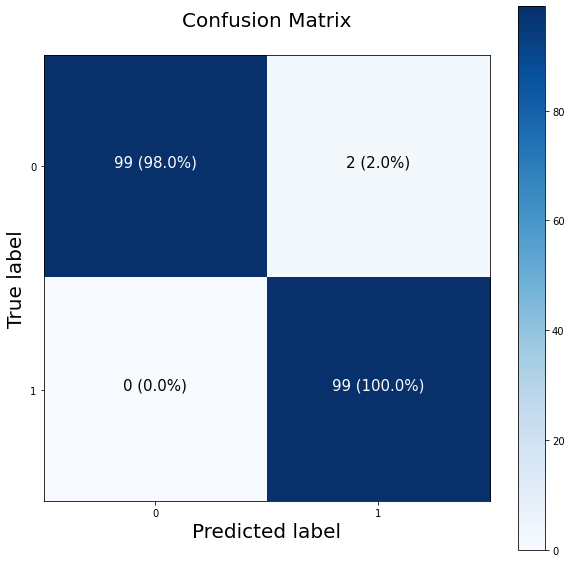

In [60]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Bu çok daha iyi görünüyor. Görünüşe göre modelimiz, iki yanlış pozitif (sağ üst köşe) dışında test setinde neredeyse mükemmel tahminler yaptı.

In [61]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


## Daha büyük bir örnekle çalışma (çok sınıflı sınıflandırma)

İkili bir sınıflandırma örneği gördük (bir veri noktasının kırmızı bir dairenin mi yoksa mavi bir dairenin mi parçası olduğunu tahmin ederek) ama ya birden fazla farklı nesne sınıfınız varsa?

Örneğin, bir moda şirketi olduğunuzu ve bir giysinin ayakkabı mı, gömlek mi yoksa ceket mi olduğunu tahmin etmek için bir sinir ağı kurmak istediğinizi varsayalım (3 farklı seçenek).

Seçenek olarak ikiden fazla sınıfınız olduğunda, buna çok sınıflı sınıflandırma denir.

İyi haber şu ki, şimdiye kadar öğrendiklerimiz (birkaç ince ayar ile) çok sınıflı sınıflandırma problemlerine de uygulanabilir.

Eylemde görelim.

Başlamak için bazı verilere ihtiyacımız olacak. Bizim için iyi olan şey, TensorFlow'un yerleşik [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) olarak bilinen çok sınıflı bir sınıflandırma veri kümesine sahip olmasıdır. Yani hemen başlayabiliriz.

[`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) modülünü kullanarak import edebiliriz.

> 📖 Kaynak: Aşağıdaki çok sınıflı sınıflandırma sorunu, TensorFlow sınıflandırma kılavuzundan uyarlanmıştır. Aşağıdaki örneği inceledikten sonra TensorFlow kılavuzunu çoğaltmak iyi bir alıştırma olacaktır.

In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [63]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Woah, büyük bir sayı listesi alıyoruz, ardından (veriler) tek bir sayı (sınıf etiketi) geliyor.

Peki ya şekiller?

In [64]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [65]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Tamam, her biri şekil (28, 28) ve bir etiket içeren 60.000 eğitim örneğinin yanı sıra 10.000 şekil test örneği (28, 28).

Ama bunlar sadece rakamlar, hadi görselleştirelim.

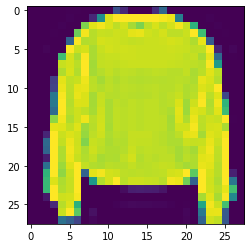

In [66]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [67]:
# Check our samples label
train_labels[7]

2

Görünüşe göre etiketlerimiz sayısal biçimde. Ve bu bir sinir ağı için iyi olsa da, onları insan tarafından okunabilir biçimde almak isteyebilirsiniz.

Sınıf adlarının küçük bir listesini oluşturalım (bunları veri kümesinin [`GitHub sayfasında`](https://github.com/zalandoresearch/fashion-mnist#labels) bulabiliriz).

🔑 Not: Bu veri kümesi bizim için hazırlanmış ve kullanıma hazır olsa da, birçok veri kümesinin bunun gibi gitmeye hazır olmayacağını unutmamak önemlidir. Genellikle bir sinir ağıyla kullanıma hazır hale getirmek için birkaç ön işleme adımı yapmanız gerekir (daha sonra kendi verilerimizle çalışırken bunun daha fazlasını göreceğiz).

In [68]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Şimdi bunlara sahibiz, başka bir örnek çizelim.

> 🤔 Soru: Üzerinde çalıştığımız verilerin nasıl göründüğüne özellikle dikkat edin. Sadece düz çizgiler mi? Yoksa düz olmayan çizgileri de var mı? Giysilerin fotoğraflarında (aslında piksel koleksiyonları olan) desenler bulmak istesek, modelimizin doğrusal olmayanlara (düz olmayan çizgiler) ihtiyacı olacak mı, olmayacak mı?

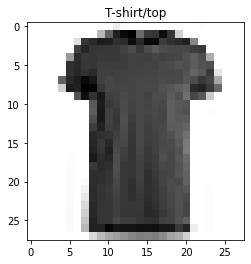

In [69]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

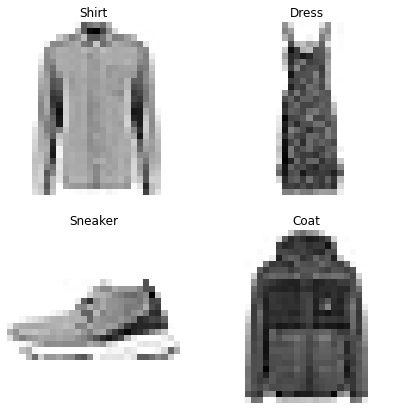

In [70]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Pekala, piksel değerleri ve etiketleri arasındaki ilişkiyi bulmak için bir model oluşturalım.

Bu çok sınıflı bir sınıflandırma problemi olduğundan, mimarimizde birkaç değişiklik yapmamız gerekecek (yukarıdaki Tablo 1 ile aynı hizada):

- Giriş şekli 28x28 tensörlerle (resimlerimizin yüksekliği ve genişliği) uğraşmak zorunda kalacak.
Aslında girdiyi (784) bir tensöre (vektöre) sıkıştıracağız.
Çıktı şeklinin 10 olması gerekecek çünkü modelimizin 10 farklı sınıf için tahmin yapmasına ihtiyacımız var.
- Ayrıca çıktı katmanımızın aktivasyon parametresini 'sigmoid' yerine "softmax" olarak değiştireceğiz. 
  - Göreceğimiz gibi, "softmax" etkinleştirme işlevi 0 ve 1 arasında bir dizi değer verir (çıktı şekliyle aynı şekil, toplamları ~1'e eşittir. En yüksek değere sahip indeks, model tarafından tahmin edilir: büyük ihtimalle sınıf.
- Kayıp fonksiyonumuzu ikili kayıp fonksiyonundan çok sınıflı kayıp fonksiyonuna değiştirmemiz gerekecek.
  - Daha spesifik olarak, etiketlerimiz tamsayı biçiminde olduğundan, etiketlerimiz tek sıcak kodlanmışsa (örneğin, [0, 0, 1, 0, 0 gibi görünüyorlardı) tf.keras.losses.SparseCategoricalCrossentropy() kullanacağız. ..]), tf.keras.losses.CategoricalCrossentropy() kullanırdık.
- fit() işlevini çağırırken validation_data parametresini de kullanacağız. Bu bize eğitim sırasında modelin test setinde nasıl performans gösterdiği hakkında bir fikir verecektir.

Hazır mısın? Hadi gidelim.

In [71]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [72]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Pekala, modelimiz, ikili sınıflandırma problemimizde kullandığımıza benzer bir stil modeli kullanarak 10 çağdan sonra yaklaşık %35 doğruluğa ulaşıyor.

Hangisi tahmin etmekten daha iyidir (10 sınıfla tahmin etmek yaklaşık %10 doğrulukla sonuçlanır), ancak daha iyisini yapabiliriz.

0 ile 1 arasındaki sayıları tercih eden sinir ağlarından bahsettiğimizi hatırlıyor musunuz? (eğer değilse, bunu bir hatırlatma olarak kabul edin)

Şu anda elimizdeki veriler 0 ile 1 arasında değil, başka bir deyişle, normalleştirilmedi (bu nedenle fit()'i çağırırken non_norm_history değişkenini kullandık). Piksel değerleri 0 ile 255 arasındadır.

Bakalım.

In [73]:
# Eğitim verilerinin minimum ve maksimum değerlerini kontrol edin
train_data.min(), train_data.max()

(0, 255)

Bu değerleri 0 ile 1 arasında, tüm diziyi maksimuma bölerek elde edebiliriz: 255.0 (şamandıraya bölmek aynı zamanda kayanlığa da dönüşür).

Bunu yapmak, tüm verilerimizin 0 ile 1 arasında olmasına neden olur (ölçeklendirme veya normalleştirme olarak bilinir).

In [74]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Güzel! Şimdi verilerimiz 0 ile 1 arasında. Modellediğimiz zaman bakalım ne olacak.

Daha önce olduğu gibi (model_11) aynı modeli kullanacağız, ancak bu sefer veriler normalize edilecek.

In [75]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Woah, daha önce olduğu gibi aynı modeli kullandık ama normalleştirilmiş verilerle artık çok daha yüksek bir doğruluk değeri görüyoruz!

Her modelin geçmişini (kayıp eğrilerini) çizelim.

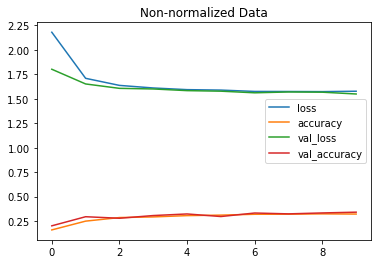

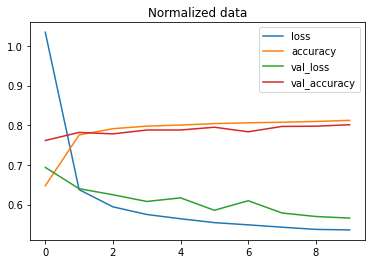

In [76]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Vay. Bu iki grafikten, normalize verili modelimizin (model_12) normalleştirilmemiş verili modele (model_11) göre ne kadar hızlı geliştiğini görebiliriz.

> 🔑 Not: Biraz farklı verilere sahip aynı model, önemli ölçüde farklı sonuçlar üretebilir. Bu nedenle, modelleri karşılaştırırken, onları aynı kriterlere göre karşılaştırdığınızdan emin olmanız önemlidir (örneğin, aynı mimari ancak farklı veriler veya aynı veriler ancak farklı mimari).

İdeal öğrenme oranını bulup ne olduğunu görmeye ne dersiniz?

Kullanmakta olduğumuz mimarinin aynısını kullanacağız.

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

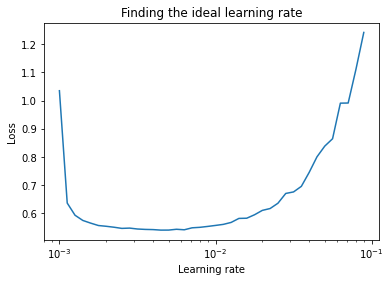

In [78]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Bu durumda, Adam optimizer'ın (0.001) varsayılan öğrenme oranına yakın bir yerde ideal öğrenme oranı gibi görünüyor.

İdeal öğrenme oranını kullanarak bir modeli yeniden yerleştirelim.

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Şimdi ideale yakın bir öğrenme oranıyla eğitilmiş ve oldukça iyi performans gösteren bir modelimiz var, birkaç seçeneğimiz var.

Yapabiliriz:
- Diğer sınıflandırma ölçütlerini (karışıklık matrisi veya sınıflandırma raporu gibi) kullanarak performansını değerlendirin.
- Tahminlerinden bazılarını değerlendirin (görselleştirmeler aracılığıyla).
- Doğruluğunu artırın (daha uzun süre eğiterek veya mimariyi değiştirerek).
- Bir uygulamada kullanmak üzere kaydedin ve dışa aktarın.
İlk iki seçeneği inceleyelim.

İlk olarak, farklı sınıflardaki tahminlerini görselleştirmek için bir sınıflandırma matrisi oluşturacağız.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Bir karışıklık matrisi doğruluk etiketlerini (test_etiketleri) tahmin edilen etiketlerle karşılaştırdığından, modelimiz ile bazı tahminler yapmamız gerekir.

In [80]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

Modelimiz bir tahmin olasılıkları listesi verir, yani belirli bir sınıfın etiket olma olasılığının ne kadar muhtemel olduğuna dair bir sayı verir.

Tahmin olasılıkları listesindeki sayı ne kadar yüksekse, modelin doğru sınıf olduğuna inanması o kadar olasıdır.

En yüksek değeri bulmak için argmax() yöntemini kullanabiliriz.

In [81]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [85]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Harika, şimdi modelimizin tahminlerini etiket biçiminde aldık, onları doğruluk etiketlerine karşı görmek için bir karışıklık matrisi oluşturalım.

In [84]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

ValueError: ignored

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Bu çok daha iyi görünüyor! (dünyadaki en sevdiğim manzaralardan biri, köşegen aşağısında koyu kareler olan bir karışıklık matrisidir)

Sonuçların olabileceği kadar iyi olmaması dışında...

Görünüşe göre modelimiz Gömlek ve T-shirt/üst sınıflar arasında kafa karıştırıyor (örneğin, aslında bir T-shirt/üst olduğunda Gömleği tahmin etmek).

> 🤔 Soru: Modelimizin Gömlek ve T-shirt/üst sınıflar arasında karıştırılması mantıklı mı? Sizce bu neden olabilir? Araştırmanın bir yolu nedir?

Bir karışıklık matrisi kullanarak model tahminlerimizin doğruluk etiketleriyle nasıl hizalandığını gördük, peki ya bazılarını görselleştirmeye ne dersiniz?

Tahmini ile birlikte rastgele bir görüntü çizmek için bir fonksiyon oluşturalım.

> 🔑 Not: Genellikle görüntülerle ve diğer görsel veri biçimleriyle çalışırken, verileri ve modelinizin çıktılarını daha iyi anlamak için mümkün olduğunca görselleştirmek iyi bir fikirdir.

In [87]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

In [88]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

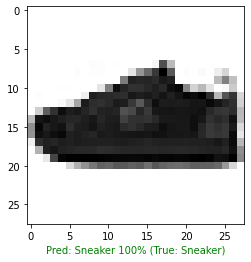

In [89]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

Yukarıdaki hücreyi birkaç kez çalıştırdıktan sonra, modelin tahminleri ile gerçek etiketler arasındaki ilişkiyi görsel olarak anlamaya başlayacaksınız.

Modelin hangi tahminlerde kafasının karıştığını anladınız mı?

Benzer sınıfları karıştırıyor gibi görünüyor, örneğin Sneaker with Ankle boot.

Resimlere baktığınızda bunun nasıl olabileceğini görebilirsiniz.

Bir Sneaker ve Ankle Boot'un genel şekli benzerdir.

Genel şekil, modelin öğrendiği kalıplardan biri olabilir ve bu nedenle, iki görüntü benzer bir şekle sahip olduğunda, tahminleri karışır.

## Modelimiz hangi kalıpları öğreniyor?
Bir sinir ağının sayılardaki kalıpları nasıl bulduğu hakkında çok konuştuk ama bu kalıplar tam olarak neye benziyor?

Modellerimizden birini açıp öğrenelim.

İlk olarak, en son modelimizde (model_14) katmanlar özniteliğini kullanarak katmanların bir listesini alacağız.

In [90]:
# Find the layers of our most recent model
model_14.layers

İndeksleme kullanarak bir hedef katmana erişebiliriz.

In [ ]:
# Extract a particular layer
model_14.layers[1]

Ve get_weights() yöntemini kullanarak belirli bir katman tarafından öğrenilen kalıpları bulabiliriz.

get_weights() yöntemi, belirli bir katmanın ağırlıklarını (ağırlık matrisi olarak da bilinir) ve sapmalarını (önyargı vektörü olarak da bilinir) döndürür.

In [91]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

ağırlık matrisi, bizim durumumuzda 784 (28x28 piksel) olan giriş verileriyle aynı şekildedir. Ve seçilen katmandaki her nöron için ağırlık matrisinin bir kopyası var (seçilen katmanımızda 4 nöron var).

Ağırlık matrisindeki her değer, girdi verilerindeki belirli bir değerin ağın kararlarını nasıl etkilediğine karşılık gelir.

Bu değerler rastgele sayılar olarak başlar (bir katman oluştururken kernel_initializer parametresi tarafından ayarlanırlar, varsayılan "glorot_uniform"dur) ve daha sonra eğitim sırasında sinir ağı tarafından verilerin daha iyi temsili değerlerine (rastgele olmayan) güncellenir. 

<img src="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png" />

In [92]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

Her nöronun bir önyargı vektörü vardır. Bunların her biri bir ağırlık matrisi ile eşleştirilir.

Önyargı değerleri varsayılan olarak sıfır olarak başlatılır (bias_initializer parametresi kullanılarak).

Önyargı vektörü, karşılık gelen ağırlık matrisindeki kalıpların bir sonraki katmanı ne kadar etkilemesi gerektiğini belirler.

In [93]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_39 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Şimdi birkaç derin öğrenme modeli oluşturduk, tüm girdiler ve çıktılar kavramının yalnızca bir modelin tamamıyla değil, bir model içindeki her katmanla da ilgili olduğunu belirtmenin tam zamanı.

Bunu zaten tahmin etmiş olabilirsiniz, ancak girdi katmanından başlayarak, sonraki her katmanın girdisi bir önceki katmanın çıktısıdır.

Bunu plot_model() yardımcı programını kullanarak açıkça görebiliriz.

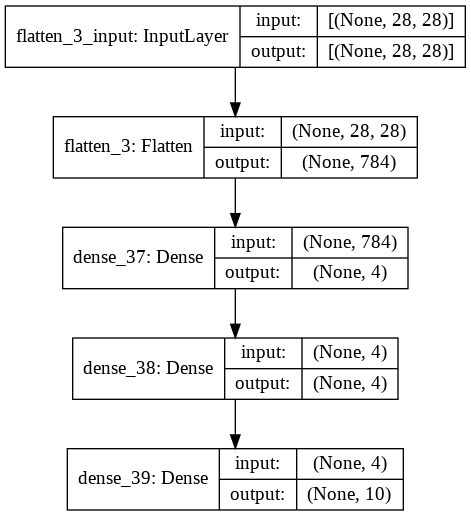

In [94]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

Bir model nasıl öğrenir (kısaca)
Pekala, bir sürü model eğittik ama kaputun altında neler olduğunu hiç tartışmadık. Peki bir model tam olarak nasıl öğrenir?

Bir model, ağırlık matrislerini ve yanlılık değerlerini her çağda güncelleyerek ve geliştirerek öğrenir (bizim durumumuzda, fit() işlevini çağırdığımızda).

Bunu, veriler ve etiketler arasında öğrendiği kalıpları gerçek etiketlerle karşılaştırarak yapar.

Mevcut modeller (ağırlık matrisleri ve yanlılık değerleri) kayıp fonksiyonunda istenen bir azalmaya neden olmazsa (daha yüksek kayıp daha kötü tahminler anlamına gelir), optimize edici modeli, modellerini doğru şekilde güncellemek için yönlendirmeye çalışır (gerçek kullanarak referans olarak etiketler).

Modelin tahminlerini geliştirmek için gerçek etiketleri referans olarak kullanma sürecine geri yayılım denir.

Başka bir deyişle, veriler ve etiketler bir modelden geçer (ileri geçiş) ve veriler ile etiketler arasındaki ilişkiyi öğrenmeye çalışır.

Ve eğer bu öğrenilen ilişki gerçek ilişkiye yakın değilse veya geliştirilebilirse, model bunu kendi içinden geçerek (geriye geçiş) ve verileri daha iyi temsil etmek için ağırlık matrislerini ve önyargı değerlerini değiştirerek yapar.

Tüm bunlar kafa karıştırıcı geliyorsa (ve öyle olması sorun değil, yukarıdaki çok kısa bir açıklamadır), daha fazlası için müfredat dışı bölümdeki kaynaklara göz atın.